# Let's derive linear regression equation using

$${\cal L}(m,b) = \frac{1}{2}\sum_d \left(y_d - mx_d - b \right)^2,$$
and the minimization condition
$$\frac{\partial {\cal L}}{\partial m} = 0,$$
$$\frac{\partial {\cal L}}{\partial b} = 0.$$

## Partials

$$\frac{\partial {\cal L}}{\partial m} = -2XdYd + 2MXd^2 + 2BXd,$$

$$\frac{\partial {\cal L}}{\partial b} = -2Yd + 2MXd + 2B.$$

## Minimization

$$\frac{\partial {\cal L}}{\partial m} = 0 = -XdYd + MXd^2 + BXd,$$

$$\frac{\partial {\cal L}}{\partial b} = 0 = -Yd + MXd + B.$$

## Solving for m, using both equations to isolate m

$$ m = -XdYd + MXd^2 + BXd ==> M * X^2/X + B = XY/X $$

$$ b = -Yd + MXd + B ==> MX + B = Y$$

### Subtract first equation from second to remove b

$$ M(X - X^2/X) = Y - XY/X $$

#### Divide by m side to isolate, then remove denominators

$$ M = (Y - XY/X) / (X-X^2/X) $$

$$ M = (X Y - XY) / ((X)^2 - X^2) ==> (E[X,Y] - E[X]E[Y]) / (E[X,X] - E[X]^2) $$

$$ M = COV(X,Y) / COV(X,X) $$

### Solving for b

$$ b = Yd - MXd ==> E[Y] - mE[X] .$$ 

# Now let's see if our derivation is correct. Let's generate some random data, add some noise and see

    x   y
0   1  11
1   2  23
2   3  26
3   4  38
4   5  44
5   6  59
6   7  62
7   8  67
8   9  75
9  10  88


<Axes: xlabel='x', ylabel='y'>

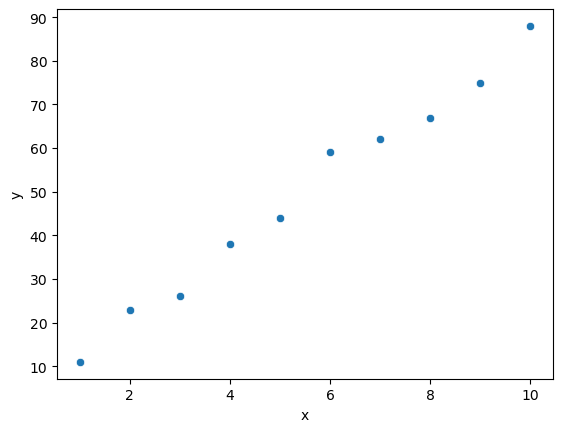

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
np.random.seed(1)
data = pd.DataFrame({"x" : np.array([1,2,3,4,5,6,7,8,9,10]), "y" : np.array([11,23,26,38,44,59,62,67,75,88])})

print(data)

sns.scatterplot(data = data, x = 'x', y='y')

In [2]:
# Noisy the data 
import random

noise = np.random.normal(0,20, len(data))

data['y'] = data['y'] + noise

data


,x,y
0,1,43.486907
1,2,10.764872
2,3,15.436565
3,4,16.540628
4,5,61.308153
5,6,12.969226
6,7,96.896235
7,8,51.775862
8,9,81.380782
9,10,83.012592


# Let's define our statistical quantities

In [3]:
EXY = mean(data['x']*data['y'])

EXEY = mean(data['x'])* mean(data['y'])

EXX = mean(data['x']**2)

EXEX = mean(data['x'])**2

EY = mean(data['y'])

EX = mean(data['x'])

m = (EXY - EXEY) / (EXX - EXEX)

b = EY - (m * EX)


# Create function for slope/intercept fit

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Check our fit!

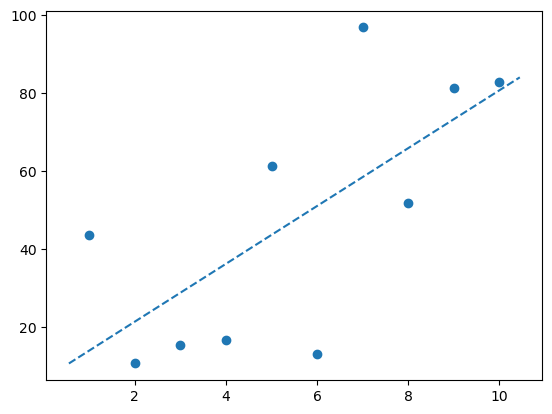

In [5]:
plt.scatter(data['x'], data['y'])


abline(m, b)   